In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# EDA

In [3]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns in the dataset

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We have 0 null values in our dataset

In [6]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


We have 0 repeated rows in the dataset

In [7]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


    We can observe:
        In EmployeeCount all the values are same, We can remove this column before training the model
        In StandardHours all the values are same, We can remove this column before training the model
        75% value of YearsAtCompany is way lesser then max value present in the column

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
cols = ['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

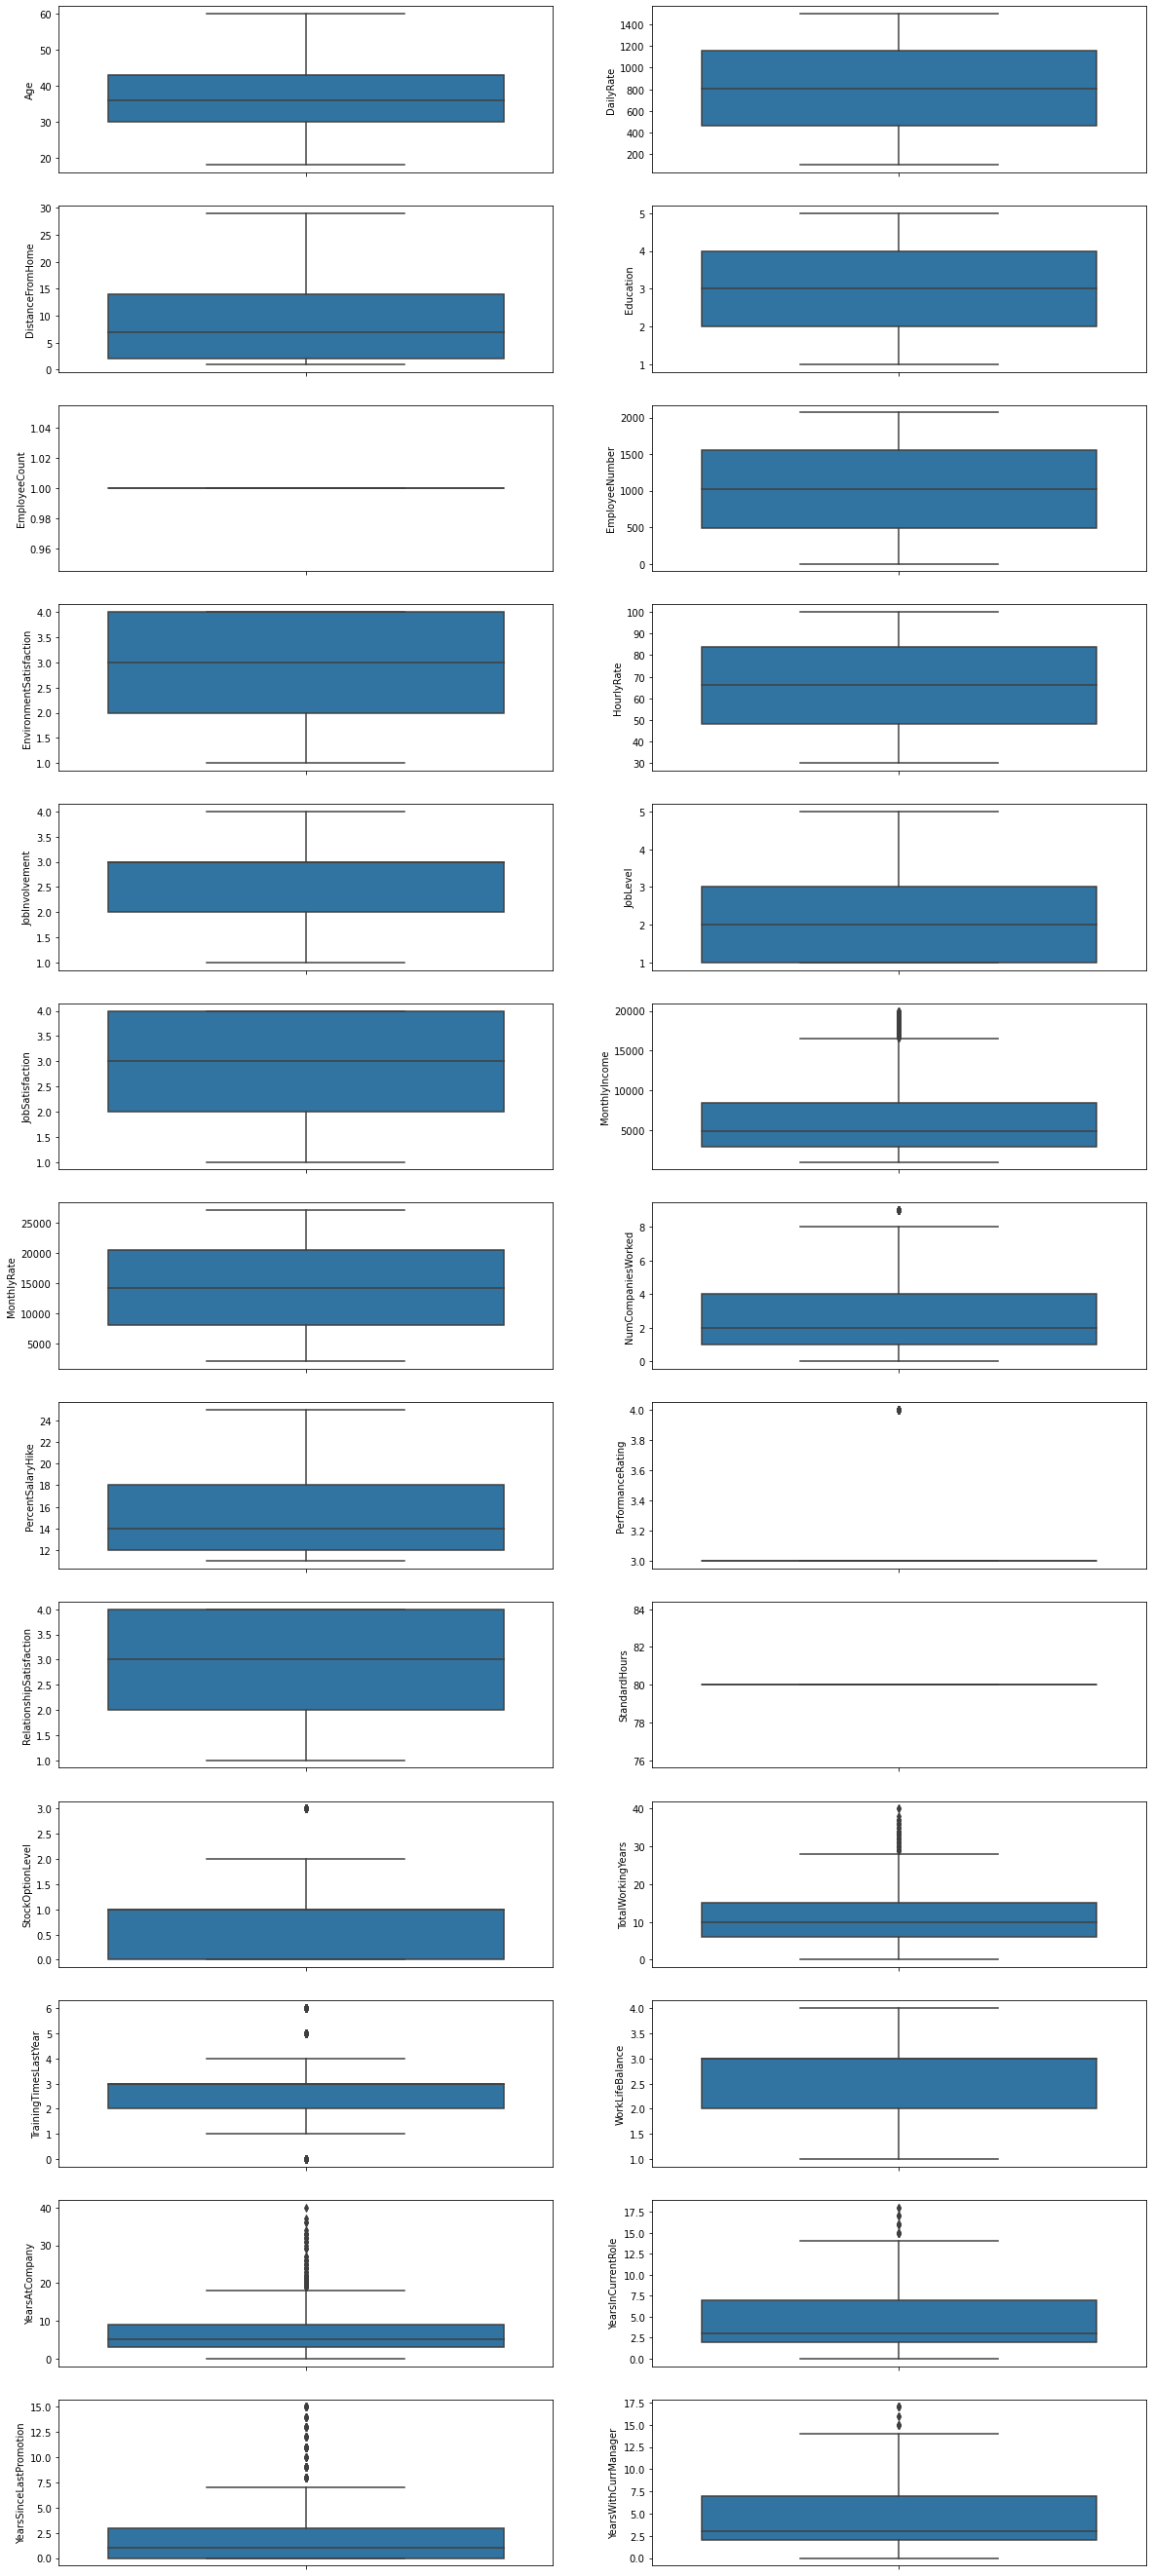

In [10]:

counter=1
plt.figure(figsize=(20,150))
counter=1;
for i in range(0,len(cols)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=cols[i],hue = cols[i],data=df)
        #sns.boxplot(df[columns[i]])


We can observe 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' have outliers present in them,

We will be required to remove the outliers before building the model

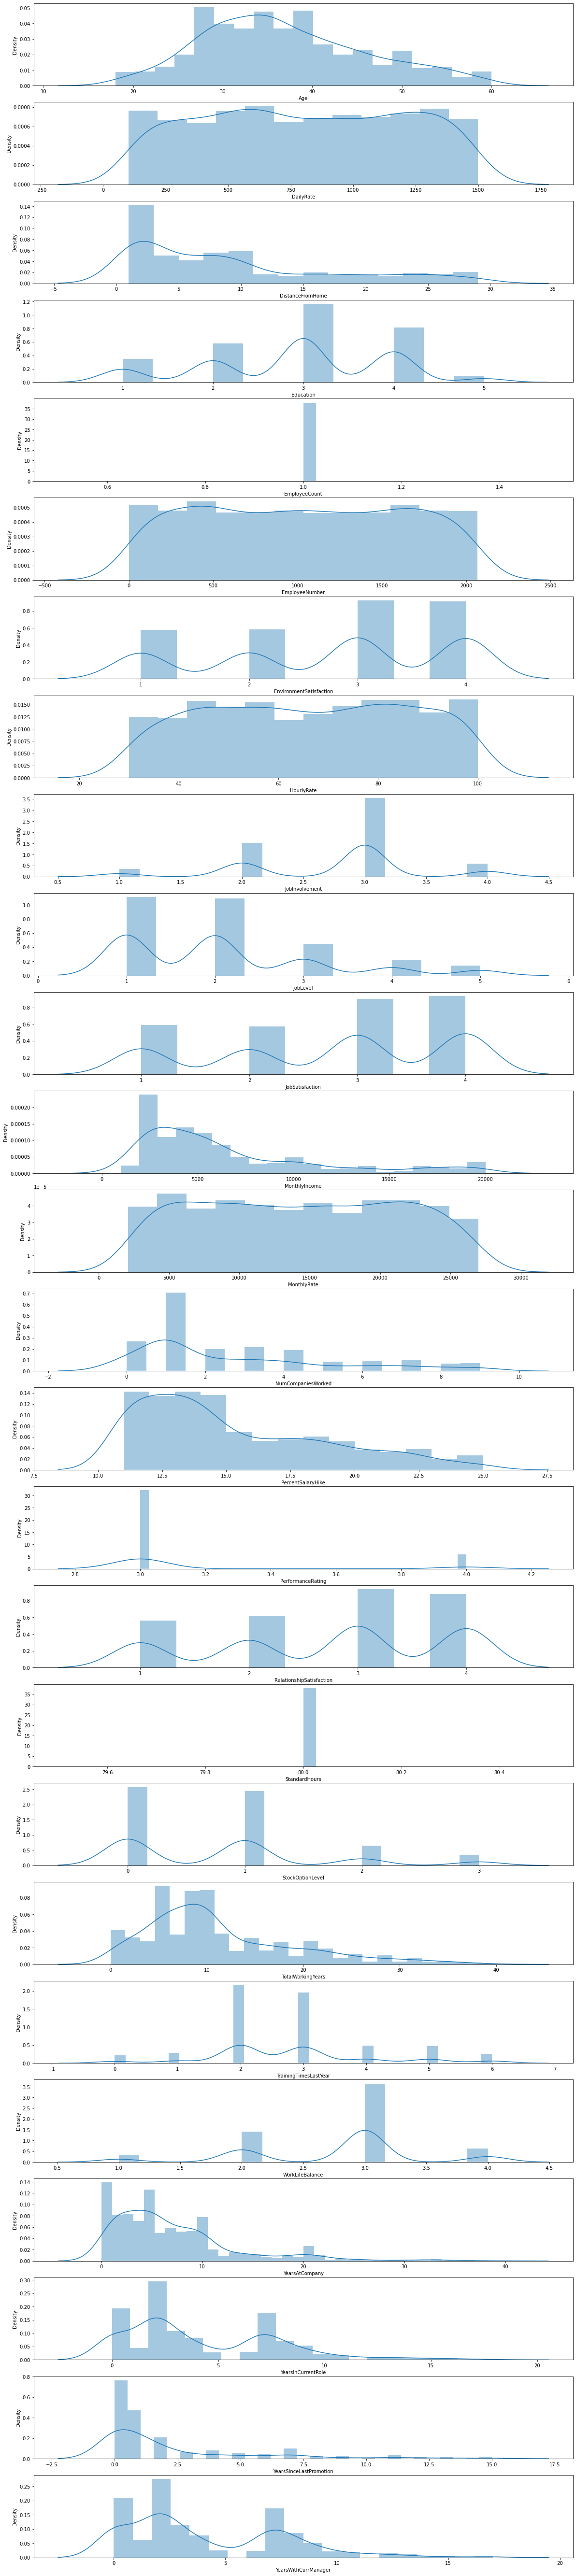

In [11]:

counter=1
plt.figure(figsize=(20,150))

counter=1;
for i in range(0,len(cols)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[cols[i]])

    We can observe:
        Education is not distributed normally
        EnvironmentSatisfaction is not distributed normally
        JobInvolvement is not distributed normally
        JobLevel is not distributed normally
        JobSatisfaction is not distributed normally
        RelationshipSatisfaction is not distributed normally
        StockOptionLevel is not distributed normally
        TrainingTimesLAstYear is not distributed normally
        WorkLifeBalance is not distributed normally
        YearWithCurrManager is not distributed normally

        We will solve this issue before building the model

In [12]:
cols1 = [ 'Attrition', 'BusinessTravel', 'Department',
        'EducationField', 'Gender',  'JobRole', 
       'MaritalStatus',
       'Over18', 'OverTime']

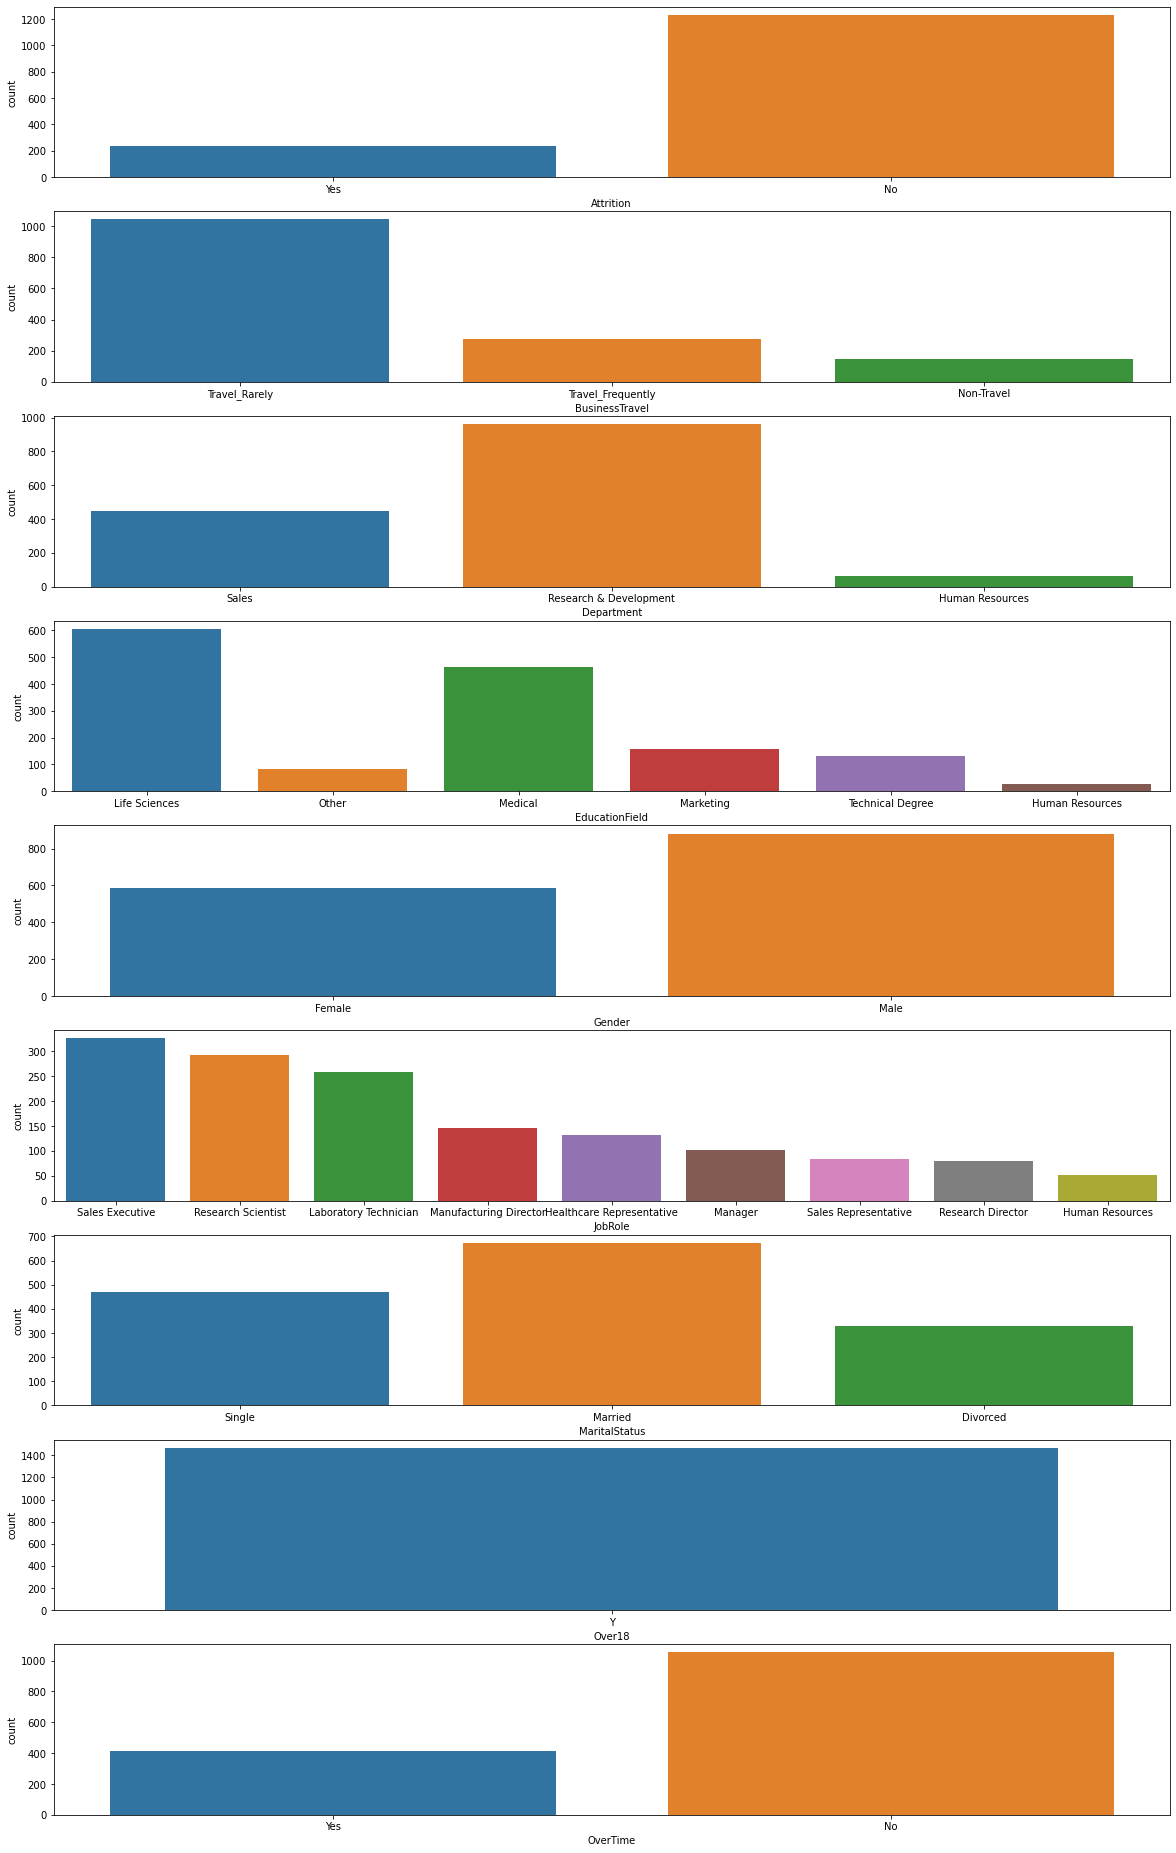

In [13]:

counter=1
plt.figure(figsize=(20,150))

counter=1;
for i in range(0,len(cols1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(df[cols1[i]])

    We can observe:
        1) Attrition our target variable is highly unbalanced for better model we would have to balance the target variable
        2) Business travel variable have majority of travel rarely
        3) OverTime variable are of majorly No type
        4) In Over18 we have all the same time Y. We can remove the column as all values are same
        5) In Gender we have 200 More males then females
        6) In EducationField variable Most of the values are of Life Sciences
    

<AxesSubplot:>

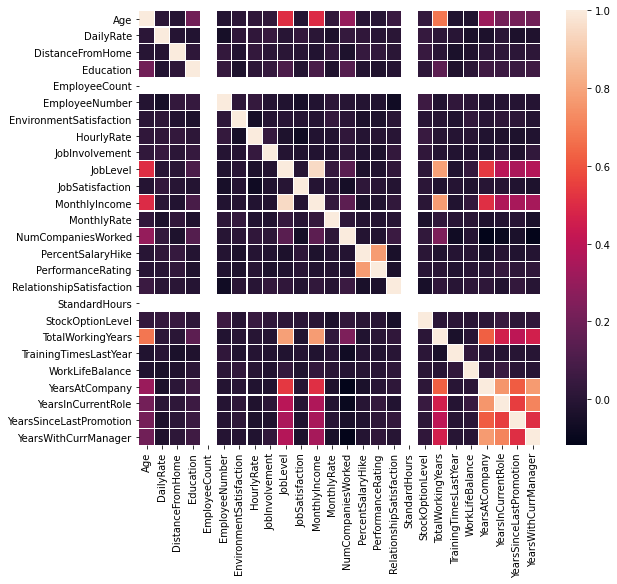

In [14]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

    We can observe: 
        Monthly income and jobLevel have high correlation
        Performance rating and PercentSalaryHike have high correlation
        TotalWorkingYears and MonthlyIncome have high correlation
        Other variables have either 0 correlation or very low correlation

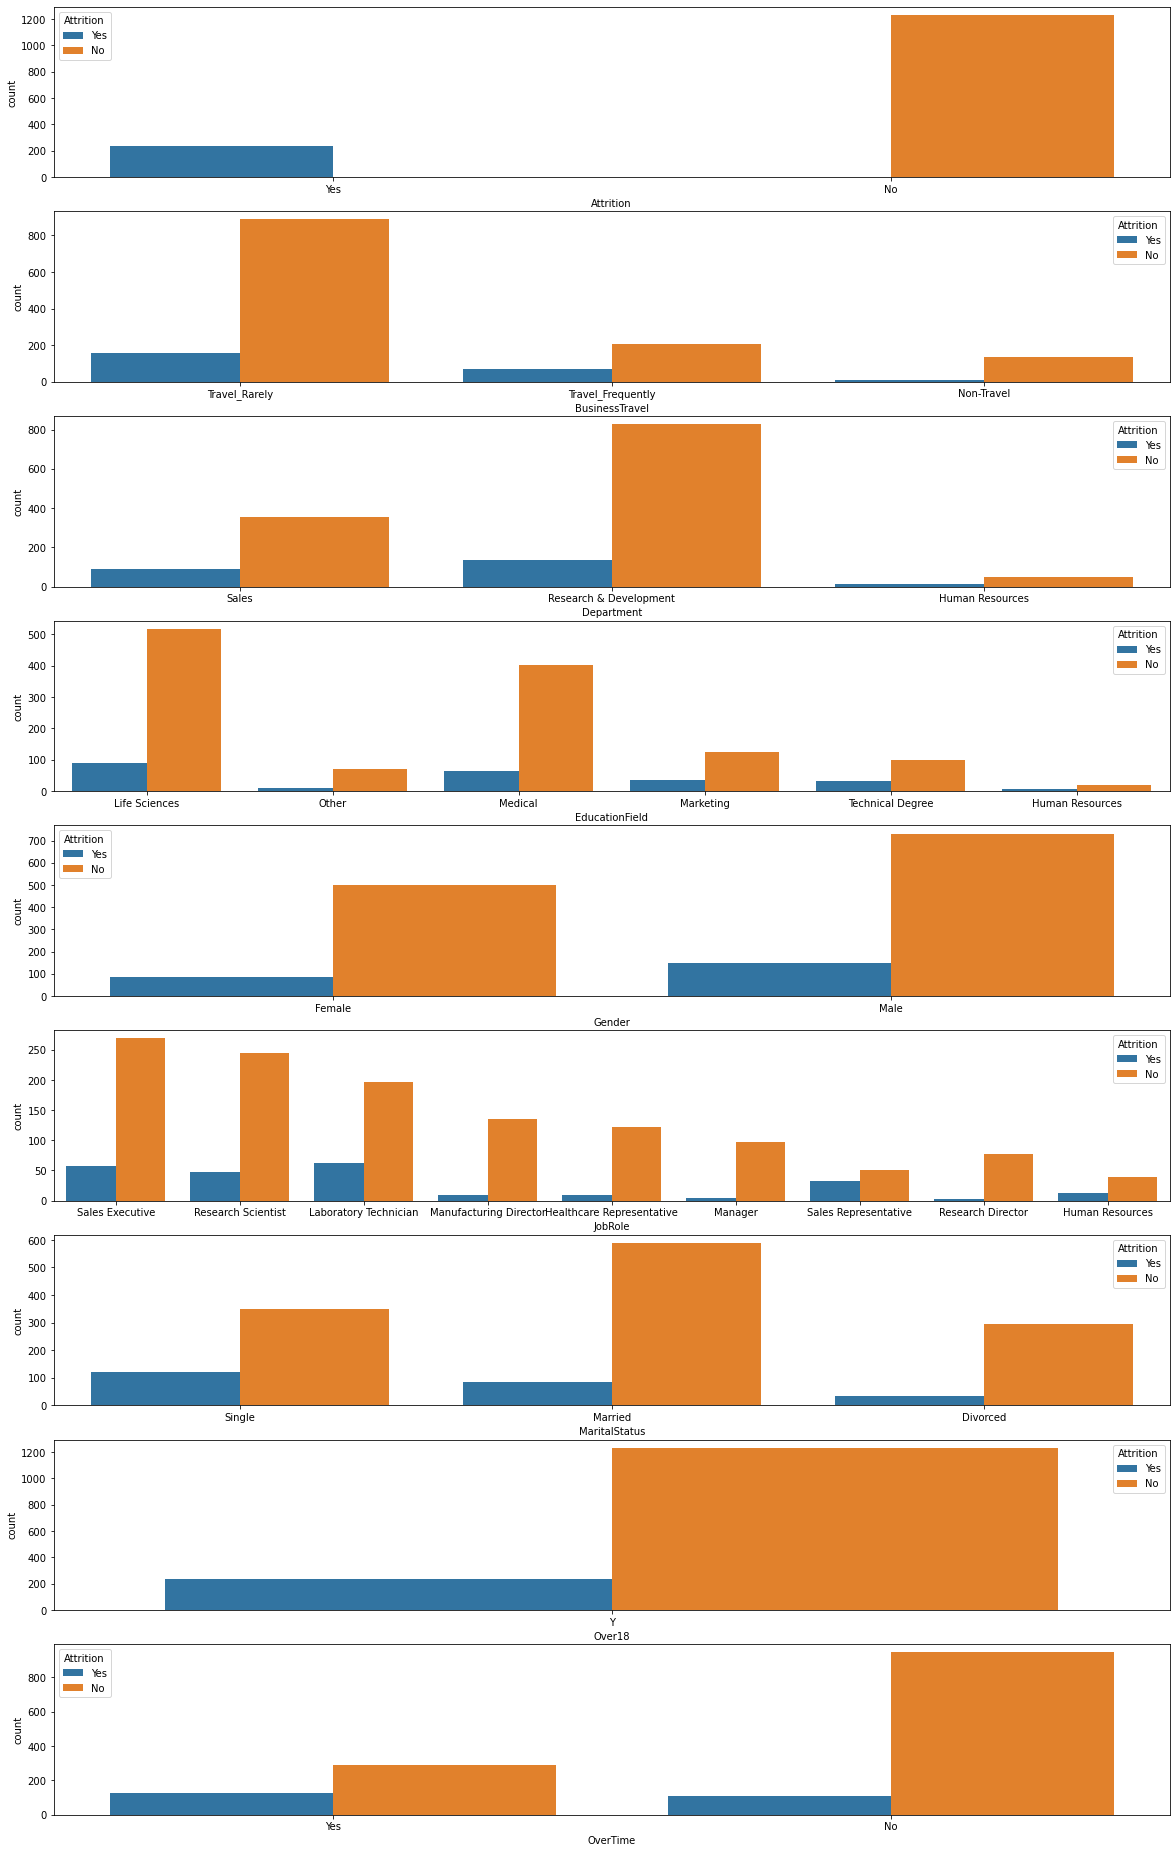

In [15]:

counter=1
plt.figure(figsize=(20,150))

counter=1;
for i in range(0,len(cols1)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(x=cols1[i],hue='Attrition',data=df)

    We can observe:
        1) Employees not doing overtime have attrition as NO
        2) Employees That are married have attrition as NO
        3) We could see more Male Employees have attrition as NO as compared to Female employees
        4) Target variable Attrition is highly unbalanced
        5) Laboratory Technicians have more Attrition as Yes when compared to other job Roles

In [16]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 
'TotalWorkingYears', 'TrainigTimesLastYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
have skewness present in them. We will remove the skewness before training the model.

# Removing outliers

In [17]:
col=['MonthlyIncome',
'NumCompaniesWorked',
'PerformanceRating',
'StockOptionLevel',
'TotalWorkingYears',
'TrainingTimesLastYear',
'YearsAtCompany',
'YearsInCurrentRole',
'YearsSinceLastPromotion',
'YearsWithCurrManager']

In [18]:
for i in col:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

# Confirming Removal of Outliers

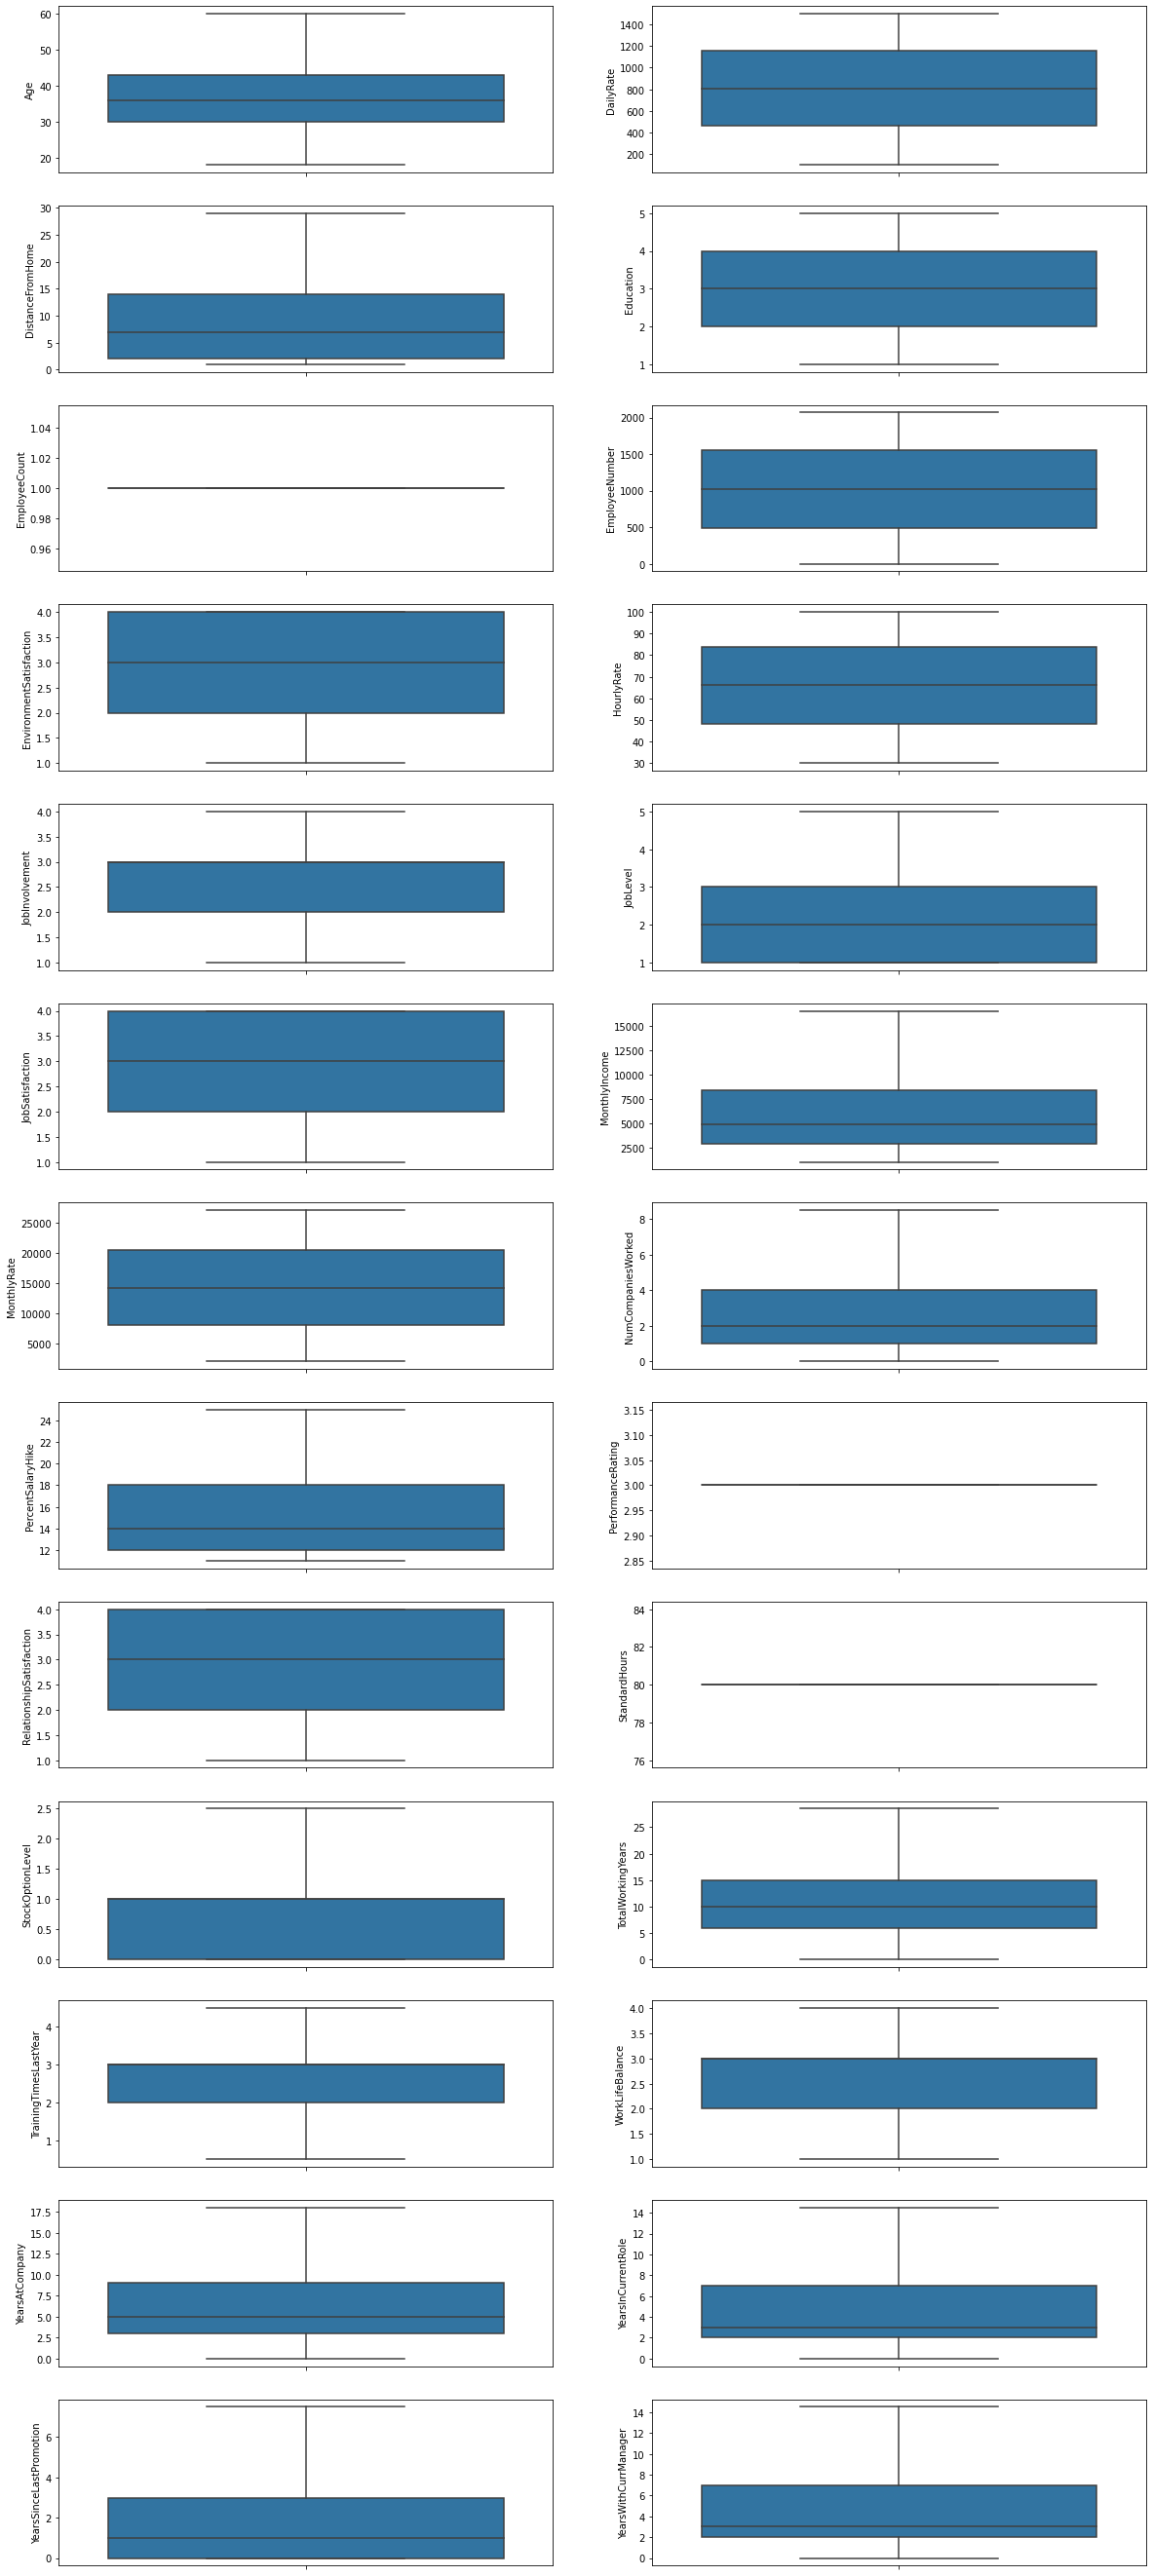

In [19]:

counter=1
plt.figure(figsize=(20,150))
counter=1;
for i in range(0,len(cols)):
        plt.subplot(40,2,counter)
        counter=counter+1
        sns.boxplot(y=cols[i],hue = cols[i],data=df)


Outliers Removed successfully

# converting the categorical to labels

In [20]:
from sklearn.preprocessing import LabelEncoder

for i in cols1:
    encoder= LabelEncoder()
    df[i]=encoder.fit_transform(df[i])

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


# Min_Max_Scaler

In [22]:
from sklearn import preprocessing
fin_df  = df.drop(['Attrition', 'BusinessTravel', 'Department',
        'EducationField', 'Gender',  'JobRole', 
       'MaritalStatus',
       'Over18', 'OverTime'],axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [23]:
final_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,...,0.000000,0.0,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,...,1.000000,0.0,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,...,0.333333,0.0,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,...,0.666667,0.0,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,...,1.000000,0.0,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931


# Removing Skewness

In [24]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# Confirming Removal of Skewness

In [25]:
fin_df_new.skew()

Age                         0.005856
DailyRate                  -0.060119
DistanceFromHome            0.196832
Education                  -0.068148
EmployeeCount               0.000000
EmployeeNumber             -0.055998
EnvironmentSatisfaction    -0.178515
HourlyRate                 -0.067371
JobInvolvement             -0.010993
JobLevel                    0.140437
JobSatisfaction            -0.185739
MonthlyIncome               0.203943
MonthlyRate                -0.054457
NumCompaniesWorked          0.176919
PercentSalaryHike           0.124288
PerformanceRating           0.000000
RelationshipSatisfaction   -0.167273
StandardHours               0.000000
StockOptionLevel            0.112221
TotalWorkingYears           0.054722
TrainingTimesLastYear      -0.013953
WorkLifeBalance            -0.003294
YearsAtCompany              0.088114
YearsInCurrentRole          0.098277
YearsSinceLastPromotion     0.383288
YearsWithCurrManager        0.103866
dtype: float64

Skewness has been successfully removed

In [26]:
fin_df_new = fin_df_new.join(df['Attrition'])
fin_df_new = fin_df_new.join(df['BusinessTravel'])
fin_df_new = fin_df_new.join(df['Department'])
fin_df_new = fin_df_new.join(df['EducationField'])
fin_df_new = fin_df_new.join(df['Gender'])
fin_df_new = fin_df_new.join(df['JobRole'])
fin_df_new = fin_df_new.join(df['MaritalStatus'])
fin_df_new = fin_df_new.join(df['Over18'])
fin_df_new = fin_df_new.join(df['OverTime'])

In [27]:
fin_df_new.shape

(1470, 35)

In [28]:
final_df=fin_df_new.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

Dropped the not required columns

# Train_Test_Split

In [29]:
x = fin_df_new.drop(["Attrition"],axis=1)
y = fin_df_new["Attrition"]

In [30]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.8321995464852607 on Random State 175


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=175)

# SMOTE

In [32]:

print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling '0': {}".format(sum(y_train_res == 0)))

Before OverSampling '1': 172
Before OverSampling '0': 857 

After OverSampling '1': 857
After OverSampling '0': 857


# Model Building

-----------Logistic Regression-----------

In [33]:

LogReg = LogisticRegression(max_iter = 500)
LogReg.fit(x_train_res,y_train_res)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       376
           1       0.35      0.71      0.46        65

    accuracy                           0.76       441
   macro avg       0.64      0.74      0.65       441
weighted avg       0.85      0.76      0.79       441



-----------Decision Tree-----------

In [34]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       376
           1       0.33      0.46      0.38        65

    accuracy                           0.78       441
   macro avg       0.61      0.65      0.62       441
weighted avg       0.82      0.78      0.79       441



-----------Random Forest-----------

In [35]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       376
           1       0.62      0.23      0.34        65

    accuracy                           0.87       441
   macro avg       0.75      0.60      0.63       441
weighted avg       0.84      0.87      0.84       441



-----------NaiveBayes-----------

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       376
           1       0.28      0.71      0.41        65

    accuracy                           0.69       441
   macro avg       0.61      0.70      0.60       441
weighted avg       0.84      0.69      0.74       441



-----------SVM-----------

In [37]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5,)

clf.fit(x_train_res, y_train_res.ravel()) 

LinearSVC(random_state=0, tol=1e-05)

In [38]:
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       376
           1       0.33      0.69      0.45        65

    accuracy                           0.75       441
   macro avg       0.63      0.73      0.64       441
weighted avg       0.85      0.75      0.78       441



# Cross Validation Score

In [39]:

print(cross_val_score(DTC,x,y,cv=5).mean())

0.7829931972789115


    Cross validation score for Decision tree - 0.78

In [40]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.85578231292517


    Cross validation score for Random Forest - 0.85

In [41]:
print(cross_val_score(LogReg,x,y,cv=5).mean())

0.8714285714285713


    Cross validation score for Logistic Regression - 0.87

In [42]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.8190476190476191


    Cross validation score for Naive Bayes - 0.81

In [43]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.8693877551020408


    Cross validation score for SVM - 0.86

    Selecting the best model
        Decision Tree - |0.78 - 0.78| =0
        Random Forest - |0.87 - 0.85| =0.02
        Logistic regression - |0.76 - 0.87|=0.11
        Naive Bayes - |0.69 - 0.81| =0.12
        SVM - |0.75 - 0.86|=0.11
        
    Best models to hypertune are Decision Tree, random Forest-> We will choose Random forest for Hypertunning as precision for 1 is higher in random forest as compared to Decision Tree. WE will confirm the Random Forest as best fit using AUC ROC curve at end after hypertuning

# Hypertuning the model

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
parameter = {
   'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [46]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]})

In [47]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1}

# Building Final Model

In [48]:

RFC = RandomForestClassifier(bootstrap= False,
 max_depth= 100,
 max_features= 'auto',
 min_samples_leaf= 1)
RFC.fit(x_train_res,y_train_res)
RFCpred = RFC.predict(x_test)
acc = classification_report(y_test,RFCpred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       376
           1       0.72      0.20      0.31        65

    accuracy                           0.87       441
   macro avg       0.80      0.59      0.62       441
weighted avg       0.85      0.87      0.84       441



# AUC_ROC Curve

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

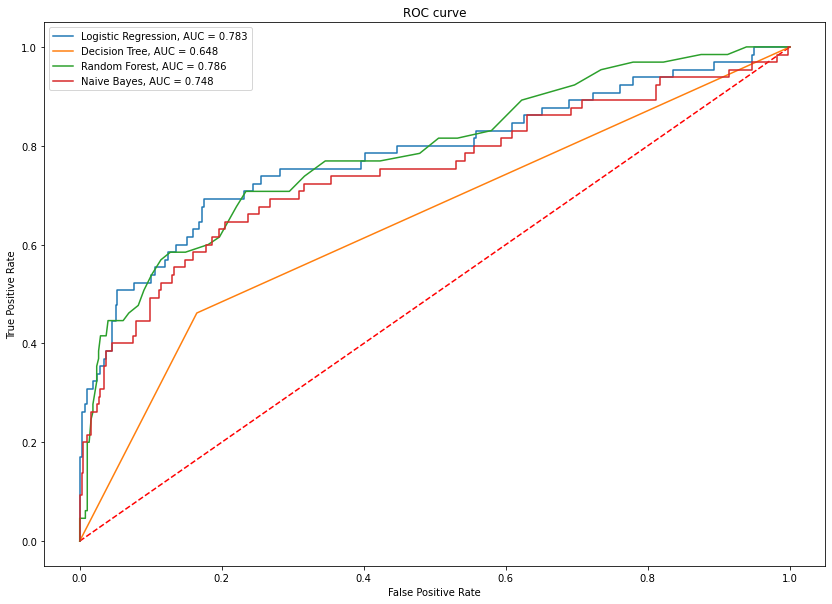

In [50]:
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = LogReg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = RFC.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

    We can observe that Random Forest have highest value i.e 0.786 as compared to other algos

# Saving the model

In [51]:
import joblib
joblib.dump(RFC,"HR Attrition.pkl")


['HR Attrition.pkl']